In [1]:
import projX
import pyemma
import numpy as np
from matplotlib import pylab as plt
from os.path import exists
%matplotlib notebook

In [2]:
trajfile = '/group/ag_cmb/scratch/gph82/work/CMB/hierarchical_TICA/bpti-shaw/DESRES-Trajectory-bpti-c-alpha/c-alpha_centered.stride.100.xtc'
if not exists(trajfile):
    trajfile = trajfile.split('/')[-1]
top  = '/group/ag_cmb/scratch/gph82/work/CMB/hierarchical_TICA/bpti-shaw/DESRES-Trajectory-bpti-c-alpha/bpti-c-alpha_centered.pdb'
if not exists(top):
    top = top.split('/')[-1]

Skip this part if you already have an Y.npy file

In [3]:
if not exists('Y.npy'):
    feat = pyemma.coordinates.featurizer(top)
    pairs = feat.pairs(range(feat.topology.n_atoms)[::2])
    feat.add_distances(pairs)
    src  = pyemma.coordinates.source(trajfile, features=feat)
    tica = pyemma.coordinates.tica(src, lag=10, dim=2)
    Y = tica.get_output()[0]
    np.save('Y.npy', Y)

# Look at the -log(PDF) plot and wonder what structures are behind it

<IPython.core.display.Javascript object>


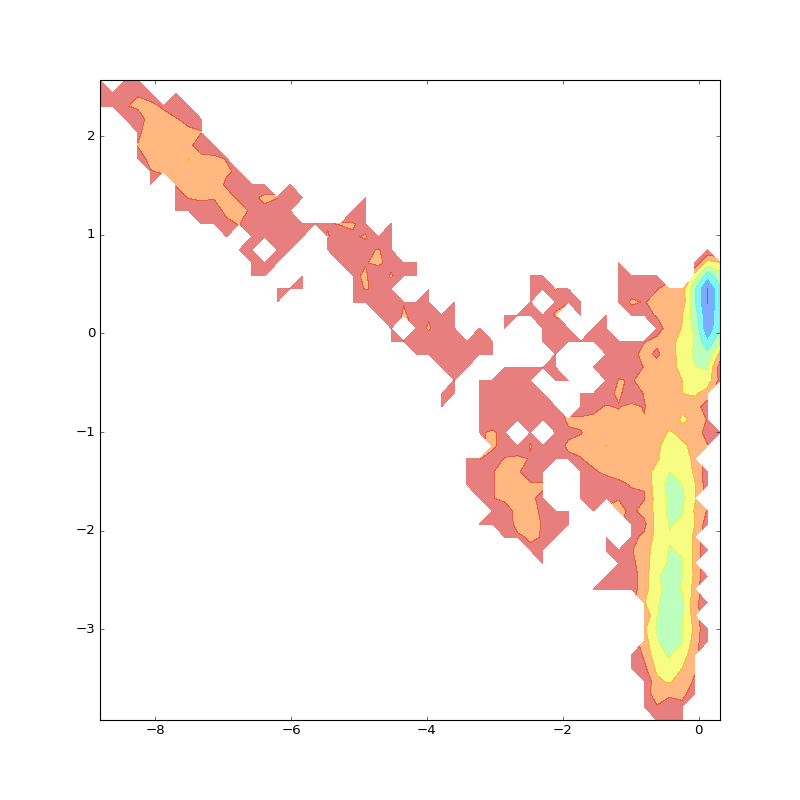

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


In [4]:
Y = np.load('Y.npy')
plt.figure(figsize=(10,10))
h, (x,y) = np.histogramdd(Y, bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)

# Use projX to generate a regspace sample of the data

In [5]:
sample, geoms = projX.generate_sample(trajfile, top, Y, 
                                      n_points=200
                                      #keep_all_samples=True,                                      
                                      #n_geom_samples=200,
                                      #verbose=True
                                    )
sample.shape, geoms

15-12-16 14:21:32 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[0] WARNING  Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
15-12-16 14:21:32 pyemma.coordinates.clustering.regspace.RegularSpaceClustering[0] INFO     Presumely finished estimation. Message: Used data for centers: 84.85%


/home/mi/gph82/programs/PyEmma/pyemma/coordinates/clustering/regspace.py:151: UserWarning: Maximum number of cluster centers reached. Consider increasing max_centers or choose a larger minimum distance, dmin.
  warnings.warn(msg)


((196, 2),
 <mdtraj.Trajectory with 196 frames, 58 atoms, 58 residues, and unitcells at 0x7f6f0c3f51d0>)

# Link the PDF plot with the sampled structures and visually explore the FES 
Click either on the plot or on the widget slidebar: they're connected! 

<IPython.core.display.Javascript object>


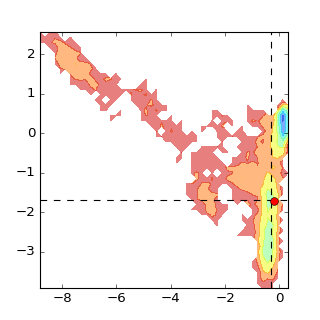

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


In [6]:
# Replot the FES
plt.figure(figsize=(10,10))
h, (x,y) = np.histogramdd(Y, bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)
# Create the linked widget
linked_wdg = projX.visualize_sample(sample, 
                              geoms.superpose(geoms[0]),                             
                              plt.gca(), 
                              clear_lines=True,
                              #plot_path=True
                            )
# Show it
linked_wdg


# Use projX to generate paths along the different projections/axis

In [13]:
paths_dict, idata = projX.generate_paths(trajfile, top, 
                                         'Y.npy', 
                                         #Y, # You can also directly give the data here
                                         n_projs=2,
                                         verbose=False, 
                                        )

# Link the PDF plot with the sampled paths/structures and visually explore the coordinates separately. 
Click either on the plot or on the widget slidebar: they're connected! You can change the type of path between min_rmsd or min_disp and you can also change the coordinate sampled (0 or 1)


In [16]:
# Choose the coordinate and the tyep of path
coord = 1
path_type = 'min_rmsd'
#path_type = 'min_disp'
igeom = paths_dict[coord][path_type]["geom"]
ipath = paths_dict[coord][path_type]["proj"]

<IPython.core.display.Javascript object>


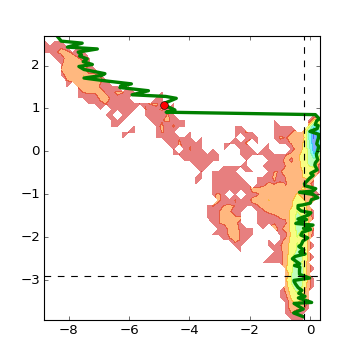

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [17]:
plt.figure(figsize=(10,10))
h, (x,y) = np.histogramdd(Y, bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)

linked_wdg = projX.visualize_sample(ipath, 
                              igeom.superpose(igeom[0]),                             
                              plt.gca(), 
                              clear_lines=True,
                              plot_path=True
                            )
linked_wdg

# You can even provide your own clustering object...

In [62]:
clkmeans = pyemma.coordinates.cluster_kmeans(Y, 10)
sample, geom = projX.generate_sample(trajfile, top, clkmeans, 
                                     #n_geom_samples=50, 
                                     keep_all_samples=True # read the doc for this argument
                                    )

15-12-16 14:48:50 pyemma.coordinates.clustering.kmeans.KmeansClustering[5] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


In [63]:
geom.save('10kmeans.xtc')

<IPython.core.display.Javascript object>


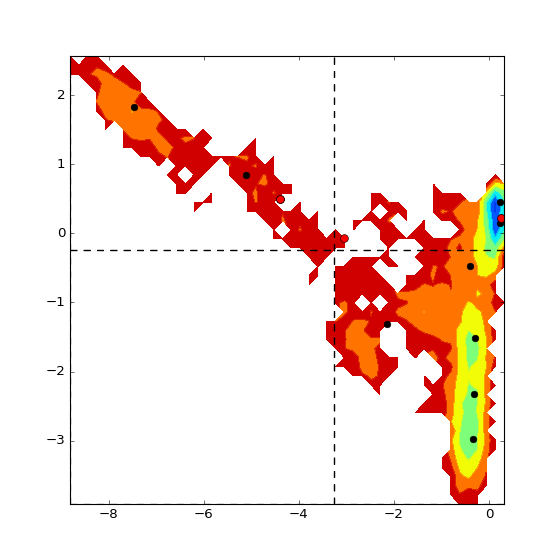

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [61]:
plt.figure(figsize=(7,7))
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)
plt.plot(clkmeans.clustercenters[:,0], clkmeans.clustercenters[:,1],' ok')
iwdg = projX.visualize_sample(sample, 
                              geom.superpose(geom[0]),                             
                              plt.gca(), 
                              clear_lines=False,
                              #plot_path=True
                            )
iwdg

In [32]:
# Check
# https://github.com/arose/nglview/issues/518
# https://github.com/arose/nglview/issues/517

# Intefacing with VMD

In [76]:
import myMDvisuals
from imp import reload

In [90]:
reload(myMDvisuals)

<module 'myMDvisuals' from '/home/mi/gph82/SOURCE_gph82/python/myMDvisuals.py'>

In [92]:
import bmutils

In [115]:
reload(bmutils)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)
bmutils.link_ax_w_pos_2_vmd(plt.gca(), sample, geoms, rep='Trace', freetext= 'start_sscache\n')

/home/mi/gph82/miniconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
